# P2 Assignment - Analysis of Titanic Passenger Data

Our goal in this exercise is to review the Titanic passenger list provided by Kaggle and answer some questions regarding the surviving passengers.

1. What percentage of passengers survived the disaster?
2. Is there a relationship (correlation) between gender and survival rate?
3. Is there a relationship between passenger class and survival rate?
4. How about a combination of gender and passenger class?

By loading this data into a python dataframe and drawing some graphs, we will attempt to answer these questions. 

Please note: The analysis of this data cannot show direct causation between these values. Our passenger data is limited to 891 out of 1317 passengers on the Titanic's maiden voyage. Many passenger records are missing age information. Also, passenger locations at the time of the disaster, as well as other factors such as passenger health, are not available in the dataset. Therefore our findings are tentative and would be more informative with a more complete data set.





First we load the CSV data into a variable: titanic_data

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns

# Read in the Titanic CSV file into a Pandas dataframe
titanic_filename = '/Users/markmavromatis/Library/Mobile Documents/com~apple~CloudDocs/Udacity/Data Science/Data Analysis/titanic_data.csv' 
titanic_data = pd.read_csv(titanic_filename)
rowcount = len(titanic_data)
print("Loaded {} Titanic data records".format(rowcount))



Loaded 891 Titanic data records


## How many passengers survived the Titanic disaster?

To find out, let us create a new dataframe where the titanic data is aggregated by survival status ('Survived'). By counting the records in each group and dividing by total record count, we can display the survival rate in a pie chart.

In [2]:
# This function groups a dataframe and returns the size as a new dataframe with group-by columns intact
def get_counts(source_dataframe, grouped_fields):
    return pd.DataFrame({'Count' : source_dataframe.groupby(grouped_fields).size()}).reset_index()

In [3]:
# We need a function to calculate the ratio based on a number (survivors / deaths) and a total (passenger count)
def calculate_ratio(fraction_amount, total_amount):
    return np.round(100.0 * fraction_amount / total_amount,2)

In [4]:
# What was the survival rate of the Titanic passengers in this limited dataset?
grouped_by_survival = get_counts(titanic_data, ['Survived'] )
grouped_by_survival['Total'] = rowcount
grouped_by_survival['Ratio'] = calculate_ratio(grouped_by_survival['Count'], grouped_by_survival['Total'])
print(grouped_by_survival[['Survived','Count','Ratio']])


   Survived  Count  Ratio
0         0    549  61.62
1         1    342  38.38


549 (61.62%) passengers died. 342 (38.38%) passengers survived. Let's see this on a pie chart.

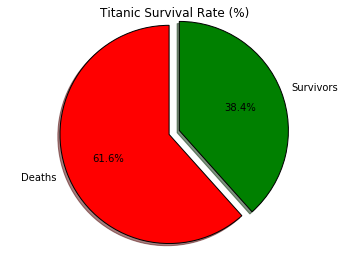

In [5]:
labels = ["Deaths", "Survivors"]
sizes = grouped_by_survival.sort_values(by='Survived')['Ratio']
colors = ['red', 'green']
explode = (0, 0.1)  # only "explode" the survivors slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("Titanic Survival Rate (%)")
plt.show()



## Does the survival ratio look different for men vs. women?

Perhaps women had higher survival rates due to the "Women and children first" priority for evacuating passengers. Let us break down the data by gender and see if the survival ratio changes.

In [7]:
# What is the gender breakdown of the Titanic passengers?
# We want to calculate ratio for men vs. women using male passenger counts and female passenger counts
grouped_by_gender = get_counts(titanic_data, ["Sex"])

# What is the gender / survival breakdown of the Titanic passengers?
grouped_by_gender_survival = get_counts(titanic_data, ['Sex', 'Survived'])

# Join the gender passenger counts against the gender/survival breakdown so that the ratios can be calculated easily.
graph_gender_survival = pd.merge(grouped_by_gender_survival,grouped_by_gender,on=['Sex'])
#graph_gender_survival.columns.values[2] = 'Count'
#graph_gender_survival.columns.values[3] = 'Total'

graph_gender_survival['Ratio'] = calculate_ratio(graph_gender_survival['Count_x'], graph_gender_survival['Count_y'])

print(graph_gender_survival)

      Sex  Survived  Count_x  Count_y  Ratio
0  female         0       81      314  25.80
1  female         1      233      314  74.20
2    male         0      468      577  81.11
3    male         1      109      577  18.89


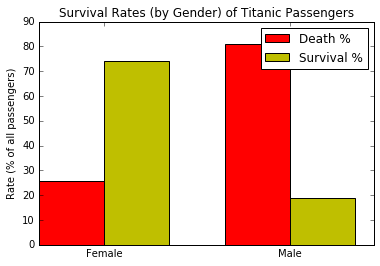

In [8]:
deaths = graph_gender_survival[graph_gender_survival.Survived == 0].sort_values(by = ['Sex'])['Ratio']
survivors = graph_gender_survival[graph_gender_survival.Survived == 1].sort_values(by = ['Sex'])['Ratio']

n = 2
ind = np.arange(n)

fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(ind, deaths, width, color='r')
rects2 = ax.bar(ind + width, survivors, width, color='y')

ax.set_ylabel('Rate (% of all passengers)')
ax.set_title("Survival Rates (by Gender) of Titanic Passengers")
ax.set_xticks(ind + 0.35)
ax.set_xticklabels(('Female','Male'))
ax.legend((rects1[0], rects2[0]), ("Death %","Survival %"))
plt.show()

### Women were much more likely to survive the Titanic disaster.

The numbers look very different for men vs. women. 

According to this dataset, 74% of the female passengers survived the Titanic disaster. Only 18% of the male passengers survived.

Gender appears to be correlated with survival rates. Let's calculate correlation using Pearson's R equation.

In [13]:
# Calculate Correlation using Pearsons R
def calculate_correlation(x, y):
    x_mean = x.mean()
    x_stddev = x.std(ddof=0)
    x_stdunits = (x - x_mean) / x_stddev

    y_mean = y.mean()
    y_stddev = y.std(ddof=0)
    y_stdunits = (y - y_mean) / y_stddev

    z = x_stdunits * y_stdunits
    return z.mean()


In [14]:
# In order to calculate Pearson's R, we need a numerical mean.
# Gender is represented as "male" or "female" in the Titanic passenger data.
# To calculate a mean for gender, we will assign an arbitrary value for gender: 1 for males and 2 for females.
def convert_gender_to_number(x):
    if x == "male":
        return 1
    else:
        return 2
    

In [15]:
correlation_gender = calculate_correlation(titanic_data['Survived'], titanic_data['Sex'].apply(convert_gender_to_number))
print("Gender / Survived correlation = " + str(round(correlation_gender, 2)))

Gender / Survived correlation = 0.54


### Gender and Survival Rate are highly correlated!

A correlation factor of 0.54 indicates a high correlation between gender and survival. 

## Let us also check Passenger Class (PClass). 

Does passenger class correlate to survival rates on the Titanic? Let's repeat the above exercise for passenger class.

1. Calculate survival / death ratio by passenger class.
2. Draw a graph showing survival rates across classes.
3. Calculate correlation.

In [16]:
# Does Passenger Class affect survival rates?
# Perhaps a higher passenger class correlates to higher survival rates on Titanic?

# What is the passenger class breakdown of the Titanic passengers?
grouped_by_pclass = get_counts(titanic_data, ["Pclass"])

# Also count survivors vs. deaths by passenger class
grouped_by_pclass_survival = get_counts(titanic_data, ["Pclass", "Survived"])

# Join the data so that we can calculate survival / death rate (count / pclass subtotal)
graph_pclass_survival = pd.merge(grouped_by_pclass_survival,grouped_by_pclass,on=['Pclass'])
graph_pclass_survival['Ratio'] = calculate_ratio(graph_pclass_survival['Count_x'], graph_pclass_survival['Count_y'])

print(graph_pclass_survival[['Pclass','Count_x','Survived','Ratio']])

   Pclass  Count_x  Survived  Ratio
0       1       80         0  37.04
1       1      136         1  62.96
2       2       97         0  52.72
3       2       87         1  47.28
4       3      372         0  75.76
5       3      119         1  24.24


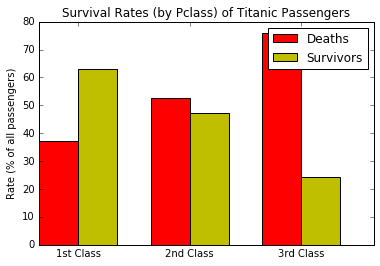

In [17]:
deaths = graph_pclass_survival[graph_pclass_survival.Survived == 0].sort_values(by = ['Pclass'])['Ratio']
survivors = graph_pclass_survival[graph_pclass_survival.Survived == 1].sort_values(by = ['Pclass'])['Ratio']

n = 3
ind = np.arange(n)

fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(ind, deaths, width, color='r')
rects2 = ax.bar(ind + width, survivors, width, color='y')

ax.set_ylabel('Rate (% of all passengers)')
ax.set_title("Survival Rates (by Pclass) of Titanic Passengers")
ax.set_xticks(ind + 0.35)
ax.set_xticklabels(('1st Class','2nd Class', '3rd Class'))
ax.legend((rects1[0], rects2[0]), ("Deaths","Survivors"))
plt.show()

In [18]:
# When calculating correlation, since we expect higher passenger class (i.e. 1st class) 
# to result in higher survival rates, let's reverse the value of passenger class so 
# that 1st class has the highest value.
def convert_pclass_to_number(x):
    if x == 1:
        return 3
    elif x == 2:
        return 2
    else:
        return 1

In [19]:
correlation_pclass = calculate_correlation(titanic_data['Survived'], titanic_data['Pclass'].apply(convert_pclass_to_number))
print("Pclass Correlation = " + str(correlation_pclass))


Pclass Correlation = 0.338481035961


## Passenger class is slightly correlated with survival rate.

However, the correlation is not as significant as gender. What happens if we combine gender and passenger class? Is this a stronger correlation than gender alone?

## Let us repeat this exercise for passenger class and gender.

1. Count the survivors and deaths for each passenger class / gender
2. Plot the data in a bar chart
3. Calculate correlation.

In [20]:
# What happens when we combine Passenger Class with Gender? 
# Do we get as stronger correlation with survival rates?

# What is the passenger class breakdown of the Titanic passengers?
grouped_by_pclass_gender = get_counts(titanic_data, ["Pclass", "Sex"])

grouped_by_pclass_gender_survival = get_counts(titanic_data, ["Pclass", "Sex", "Survived"])

graph_pclass_gender_survival = pd.merge(grouped_by_pclass_gender_survival,grouped_by_pclass_gender,on=['Pclass', 'Sex'])
graph_pclass_gender_survival['Ratio'] = calculate_ratio(graph_pclass_gender_survival['Count_x'], graph_pclass_gender_survival['Count_y'])

print(graph_pclass_gender_survival[['Pclass','Sex','Survived','Ratio']])


    Pclass     Sex  Survived  Ratio
0        1  female         0   3.19
1        1  female         1  96.81
2        1    male         0  63.11
3        1    male         1  36.89
4        2  female         0   7.89
5        2  female         1  92.11
6        2    male         0  84.26
7        2    male         1  15.74
8        3  female         0  50.00
9        3  female         1  50.00
10       3    male         0  86.46
11       3    male         1  13.54


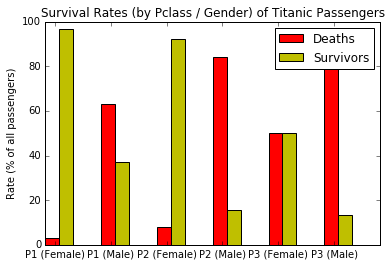

In [21]:
deaths = graph_pclass_gender_survival[graph_pclass_gender_survival.Survived == 0].sort_values(by = ['Pclass', 'Sex'])['Ratio']
survivors = graph_pclass_gender_survival[graph_pclass_gender_survival.Survived == 1].sort_values(by = ['Pclass', 'Sex'])['Ratio']

n = 6
ind = np.arange(n) * 2

fig, ax = plt.subplots()
width = 0.50
rects1 = ax.bar(ind, deaths, width, color='r')
rects2 = ax.bar(ind + width, survivors, width, color='y')

ax.set_ylabel('Rate (% of all passengers)')
ax.set_title("Survival Rates (by Pclass / Gender) of Titanic Passengers")
ax.set_xticks(ind + 0.35)
ax.set_xticklabels(('P1 (Female)','P1 (Male)','P2 (Female)','P2 (Male)','P3 (Female)','P3 (Male)'))
ax.legend((rects1[0], rects2[0]), ("Deaths","Survivors"))
plt.show()

In [22]:
# To calculate correlation here, both gender and passenger class have to be converted to numeric values.
# Male = 1, Female = 2
# Pclass 1 = 3, Pclass 2 = 2, Pclass 3 = 3
# Compare survival status (0 = death, 1 = survived) against product of gender and passenger class numeric values. 
product_pclass_gender = titanic_data['Sex'].apply(convert_gender_to_number) * titanic_data['Pclass'].apply(convert_pclass_to_number)
correlation_pclass_gender = calculate_correlation(titanic_data['Survived'], product_pclass_gender)
print("Pclass / Gender correlation = " + str(correlation_pclass_gender))



Pclass / Gender correlation = 0.569849431566


## Pclass + Gender correlation is higher than gender alone.

These factors have a correlation ratio of 0.57. This correlation is slightly higher than gender alone (0.54). 

From the graph, it is apparent that survival rates come down for lower passenger classes. There is a large difference in survival rates between the top and bottom passenger classes for both females (97% vs. 50%) and males (37% vs. 14%). However there is not much difference between survival rates for women in the top two passenger classes (97%, 92%) and men in the lower two passenger classes (16%, 14%).

## References:

* Matplotlib Documentation (Axes): http://matplotlib.org/api/axes_api.html
* Matplotlib Documentation (Pyplot): http://matplotlib.org/api/pyplot_api.html
* Kaggle Titanic Challenge: https://www.kaggle.com/c/titanic
* Wikipedia Titanic Information: https://en.wikipedia.org/wiki/RMS_Titanic
